In [ ]:
import zipfile
import os

# Get the name of the uploaded file
filename = '/content/images.zip'

# Create a directory to extract to
extract_dir = "/content/unzipped"
os.makedirs(extract_dir, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Extracted to {extract_dir}")

In [2]:
import glob
import imageio.v3 as iio
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from matplotlib import pyplot as plt
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split

# Set random seeds for reproducibility
tf.random.set_seed(0)
np.random.seed(0)


In [3]:
# Variables
seconds = 12.8
seconds_per_pixel = 0.1
num_sequence = 10
COMPOSERS = ["Bach", "Beethoven", "Chopin", "Mozart"]
image_dir = "unzipped/images"

Looking in directory: unzipped/images/Bach
Found image file: unzipped/images/Bach/Bwv026.6_visual.png
Found image file: unzipped/images/Bach/039100b__visual.png
Found image file: unzipped/images/Bach/026700b__visual.png
Found image file: unzipped/images/Bach/065500b__visual.png
Found image file: unzipped/images/Bach/031100b__visual.png
Found image file: unzipped/images/Bach/Bwv1047 Brandenburg Concert n2 1mov_visual.png
Found image file: unzipped/images/Bach/Bwv016.6_visual.png
Found image file: unzipped/images/Bach/Bwv1052 Harpsichord Concerto n1 3mov_visual.png
Found image file: unzipped/images/Bach/Bwv1051 Brandenburg Concert n6 2mov_visual.png
Found image file: unzipped/images/Bach/040400bv_visual.png
Found image file: unzipped/images/Bach/064800b__visual.png
Found image file: unzipped/images/Bach/028800b__visual.png
Found image file: unzipped/images/Bach/14. Duet In Unum _visual.png
Found image file: unzipped/images/Bach/AveMaria_visual.png
Found image file: unzipped/images/Bach/0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.5622 - loss: 1.0373 - val_accuracy: 0.7190 - val_loss: 0.7283
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7206 - loss: 0.6927 - val_accuracy: 0.7614 - val_loss: 0.6396
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8020 - loss: 0.5251 - val_accuracy: 0.7516 - val_loss: 0.6765
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8454 - loss: 0.3821 - val_accuracy: 0.7614 - val_loss: 0.7207
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8695 - loss: 0.2948 - val_accuracy: 0.7451 - val_loss: 0.7164
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9318 - loss: 0.1908 - val_accuracy: 0.7647 - val_loss: 0.7973
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9773 - loss: 0.0710 - val_accuracy: 0.7810 - val_loss: 1.0026
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9740 - loss: 0.0739 - val_accuracy: 0.7320 - v

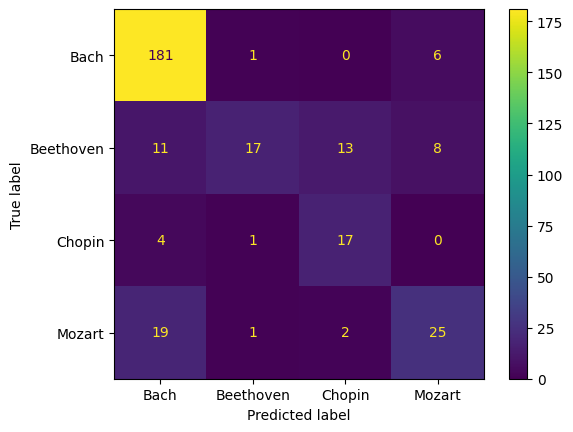

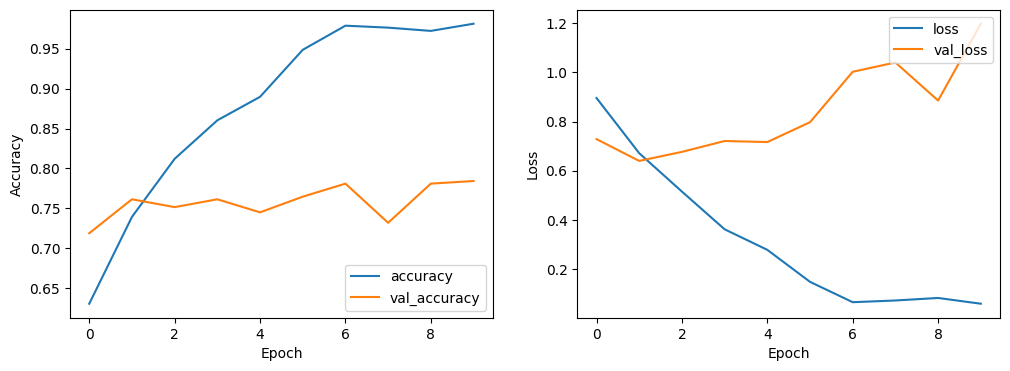

In [14]:
import os
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Define image size and channels
IMG_SIZE = (128, 128)
CHANNELS = 1  # Grayscale

# Function to load images and labels
def load_images(image_dir, composers, img_size, channels):
    images = []
    labels = []
    for composer in composers:
        composer_dir = os.path.join(image_dir, composer)
        print(f"Looking in directory: {composer_dir}")  # Debugging statement
        for img_file in glob.glob(os.path.join(composer_dir, "*.png")):
            print(f"Found image file: {img_file}")  # Debugging statement
            img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE if channels == 1 else cv2.IMREAD_COLOR)
            if img is not None:
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(composer)
            else:
                print(f"Failed to load image: {img_file}")  # Debugging statement
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load images and labels
images, labels = load_images(image_dir, COMPOSERS, IMG_SIZE, CHANNELS)

# Check if images and labels were loaded
print(f"Number of images loaded: {len(images)}")  # Debugging statement
print(f"Number of labels loaded: {len(labels)}")  # Debugging statement

if len(images) == 0 or len(labels) == 0:
    raise ValueError("No images or labels were loaded. Please check the image directory and file paths.")

# Normalize image data
images = images / 255.0

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=0)

# Expand dimensions if needed
if CHANNELS == 1:
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

# Define the CNN model
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], CHANNELS)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(len(COMPOSERS), activation='softmax')
    ])
    return model

# Compile the model
model = build_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_classes, display_labels=COMPOSERS)
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


Reloading Tuner from tuner_dir/music_classification/tuner0.json

The optimal number of units in the first densely-connected layer is 128,
the optimal number of filters in the first convolutional layer is 96 with a kernel size of 3,
and the optimal number of filters in the second convolutional layer is 32 with a kernel size of 5.



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.5812 - loss: 1.0949 - val_accuracy: 0.6895 - val_loss: 0.7640
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7238 - loss: 0.7133 - val_accuracy: 0.7549 - val_loss: 0.6591
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8139 - loss: 0.5104 - val_accuracy: 0.7320 - val_loss: 0.6343
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8993 - loss: 0.3000 - val_accuracy: 0.7549 - val_loss: 0.6599
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9495 - loss: 0.1475 - val_accuracy: 0.7745 - val_loss: 0.7742
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9633 - loss: 0.0996 - val_accuracy: 0.7680 - val_loss: 0.7442
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9656 - loss: 0.1183 - val_accuracy: 0.7745 - val_loss: 0.8816
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9774 - loss: 0.0609 - val_accuracy: 0.7941 - v

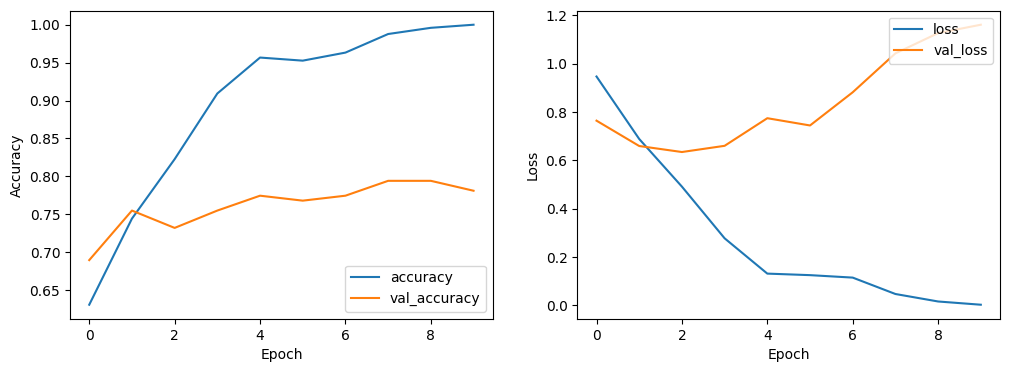

In [15]:

# Hyperparameter tuning
from keras_tuner import RandomSearch

def build_model(hp):
    model = models.Sequential([
        layers.Conv2D(
            filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice('conv_1_kernel', values=[3, 5]),
            activation='relu',
            input_shape=(IMG_SIZE[0], IMG_SIZE[1], CHANNELS)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(
            filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=32),
            kernel_size=hp.Choice('conv_2_kernel', values=[3, 5]),
            activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(
            units=hp.Int('dense_units', min_value=32, max_value=128, step=32),
            activation='relu'),
        layers.Dense(len(COMPOSERS), activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='tuner_dir',
    project_name='music_classification')

tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the first densely-connected layer is {best_hps.get('dense_units')},
the optimal number of filters in the first convolutional layer is {best_hps.get('conv_1_filter')} with a kernel size of {best_hps.get('conv_1_kernel')},
and the optimal number of filters in the second convolutional layer is {best_hps.get('conv_2_filter')} with a kernel size of {best_hps.get('conv_2_kernel')}.
""")

# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the optimized model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Optimized test accuracy: {test_acc}')

# Plot optimized training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


Looking in directory: /content/unzipped/images/Bach
Found image file: /content/unzipped/images/Bach/Bwv026.6_visual.png
Found image file: /content/unzipped/images/Bach/039100b__visual.png
Found image file: /content/unzipped/images/Bach/026700b__visual.png
Found image file: /content/unzipped/images/Bach/065500b__visual.png
Found image file: /content/unzipped/images/Bach/031100b__visual.png
Found image file: /content/unzipped/images/Bach/Bwv1047 Brandenburg Concert n2 1mov_visual.png
Found image file: /content/unzipped/images/Bach/Bwv016.6_visual.png
Found image file: /content/unzipped/images/Bach/Bwv1052 Harpsichord Concerto n1 3mov_visual.png
Found image file: /content/unzipped/images/Bach/Bwv1051 Brandenburg Concert n6 2mov_visual.png
Found image file: /content/unzipped/images/Bach/040400bv_visual.png
Found image file: /content/unzipped/images/Bach/064800b__visual.png
Found image file: /content/unzipped/images/Bach/028800b__visual.png
Found image file: /content/unzipped/images/Bach/14

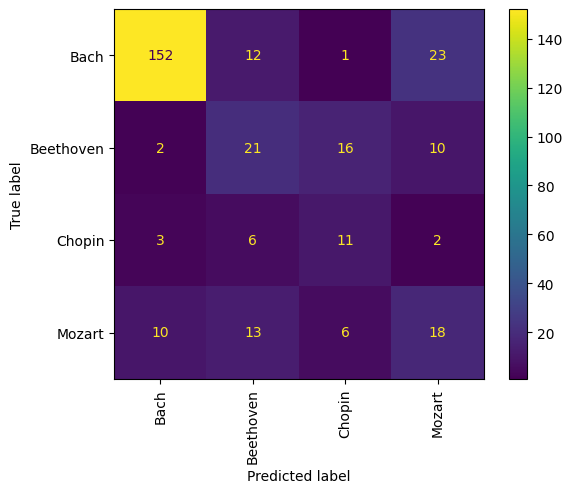

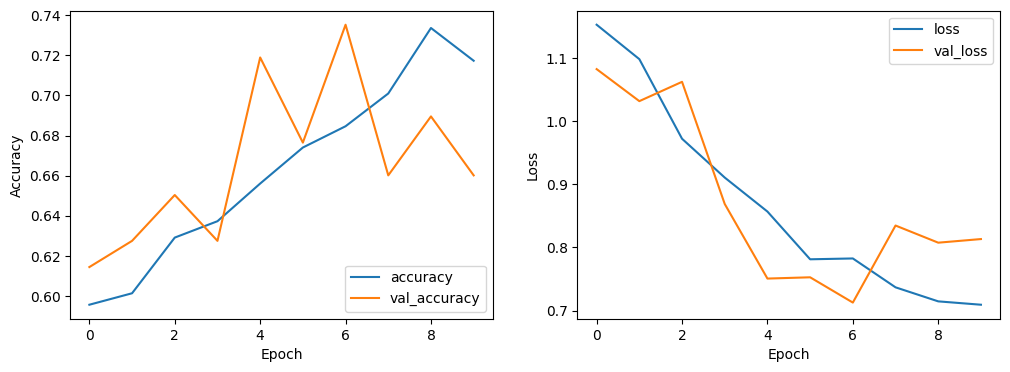

In [27]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras import Input

# Define image size and channels
IMG_SIZE = (128, 128)
CHANNELS = 1  # Grayscale

# Function to load images and labels
def load_images(image_dir, composers, img_size, channels):
    images = []
    labels = []
    for composer in composers:
        composer_dir = os.path.join(image_dir, composer)
        print(f"Looking in directory: {composer_dir}")  # Debugging statement
        for img_file in glob.glob(os.path.join(composer_dir, "*.png")):
            print(f"Found image file: {img_file}")  # Debugging statement
            img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE if channels == 1 else cv2.IMREAD_COLOR)
            if img is not None:
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(composer)
            else:
                print(f"Failed to load image: {img_file}")  # Debugging statement
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load images and labels
image_dir = '/content/unzipped/images'
COMPOSERS = ['Bach', 'Beethoven', 'Chopin', 'Mozart']
images, labels = load_images(image_dir, COMPOSERS, IMG_SIZE, CHANNELS)

# Check if images and labels were loaded
print(f"Number of images loaded: {len(images)}")  # Debugging statement
print(f"Number of labels loaded: {len(labels)}")  # Debugging statement

if len(images) == 0 or len(labels) == 0:
    raise ValueError("No images or labels were loaded. Please check the image directory and file paths.")

# Normalize image data
images = images / 255.0

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)

# Print unique classes to debug
unique_classes = np.unique(labels_encoded)
num_classes = len(unique_classes)
print(f"Unique classes: {unique_classes}")
print(f"Number of unique classes: {num_classes}")

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=0)

# Expand dimensions if needed
if CHANNELS == 1:
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

# Reshape data for LSTM
X_train = X_train.reshape((X_train.shape[0], IMG_SIZE[0], IMG_SIZE[1]))
X_test = X_test.reshape((X_test.shape[0], IMG_SIZE[0], IMG_SIZE[1]))

# Define the LSTM model
def build_model(input_shape, num_classes):
    model = models.Sequential([
        Input(shape=input_shape),
        layers.LSTM(128, return_sequences=True),
        layers.LSTM(128),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Compile the model
model = build_model((IMG_SIZE[0], IMG_SIZE[1]), num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted', zero_division=1)
recall = recall_score(y_true, y_pred_classes, average='weighted', zero_division=1)
f1 = f1_score(y_true, y_pred_classes, average='weighted', zero_division=1)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Debug: Print the unique values in y_true and y_pred_classes
print(f"Unique values in y_true: {np.unique(y_true)}")
print(f"Unique values in y_pred_classes: {np.unique(y_pred_classes)}")

# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_true, y_pred_classes, display_labels=COMPOSERS, xticks_rotation='vertical')
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
